<a href="https://colab.research.google.com/github/shin-hyunsoo/python/blob/master/dss_dp_hw1_r1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Normal - Library ----------------------------------------------------------------------------------
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

# MLP - Library -------------------------------------------------------------------------------------
from keras import models
from keras import layers
from keras import optimizers
from keras.utils.np_utils import to_categorical


Using TensorFlow backend.


In [0]:
#!pip install -U -q PyDrive

In [0]:
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials
   
# # PyDrive Authentication
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)


In [0]:
# folder_id = '1-8S7zrqtZn26NMP9JODBzdv7OMxmOVLo'
   
# def ListFolder(parent):
#     filelist=[]
#     file_list = drive.ListFile({'q': "'%s' in parents and trashed=false" % parent}).GetList()
#     for f in file_list:
#         if f['mimeType']=='application/vnd.google-apps.folder': # if folder
#             filelist.append({"id":f['id'],"title":f['title'],"list":ListFolder(f['id'])})
#         else:
#             filelist.append({"title":f['title'],"id":f['id']})
#     return filelist
   
   
# file_lists = ListFolder(folder_id)
# print(file_lists)

In [0]:
# choose a local (colab) directory to store the data.
# local_download_path = os.path.expanduser('~/my_sample_data')
# try:
# 	os.makedirs(local_download_path)
# except: pass

In [0]:
# ret = []
# for file in file_lists:
#     print('title: %s, id: %s' % (file['title'], file['id']))
#     fname = os.path.join(local_download_path, file['title'])
#     print('downloading to {}'.format(fname))
#     f_ = drive.CreateFile({'id': file['id']})
#     f_.GetContentFile(fname)
#     print(fname)
#     ret.append(fname)

In [0]:
# df = pd.read_csv(ret[0], encoding="ISO-8859-1", sep='delimiter')

In [0]:
# df.head()

In [0]:
from sklearn import preprocessing

def transscale(scaler, x_data):
    if scaler=="NONE()" or scaler=="NONE" or scaler=="NONE(" :
        return x_data
    else:
        orglist = list(x_data.columns)
        x_data_scaled = scaler.fit_transform(x_data[orglist])
        x_data_scaled = pd.DataFrame(x_data_scaled, columns=orglist)
        return x_data_scaled

def graph(hist, option):
    fig, loss_ax = plt.subplots()
    acc_ax = loss_ax.twinx()
    loss_ax.plot(hist.history['loss'], 'y', label='train loss')
    if option=="train_val" :
        loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
    acc_ax.plot(hist.history['acc'], 'b', label='train acc')
    if option=="train_val" :
        acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
    loss_ax.set_xlabel('epoch')
    loss_ax.set_ylabel('loss')
    acc_ax.set_ylabel('accuray')
    loss_ax.legend(loc='upper left')
    acc_ax.legend(loc='lower left')
    plt.show()
    return None


from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

def create_model(loop_cnt, count_feature, count__output, a_func, last_activation, opti_func, v_loss):
    model = models.Sequential()

    for loop_idx in range(loop_cnt):
        if loop_idx==0: model.add( layers.Dense(set_Node[loop_idx], activation=a_func, input_shape=(count_feature,) ) )
        else:           model.add( layers.Dense(set_Node[loop_idx], activation=a_func ) )

    model.add( layers.Dense(count__output, activation=last_activation) )       
    model.compile(optimizer = opti_func, loss = v_loss, metrics = ['accuracy'])

    return model

In [3]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [4]:
!ls -rtl /gdrive/My\ Drive/DATA

total 295
-rw------- 1 root root  13756 Oct  9 10:54 Iris_data.xlsx
-rw------- 1 root root  21510 Oct  9 10:55 Liver_data.xlsx
-rw------- 1 root root 265656 Oct  9 10:56 Abalone_original.xlsx


In [0]:
df = pd.read_excel("/gdrive/My Drive/DATA/Iris_data.xlsx")

In [6]:
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


(105, 4)
(45, 3)







/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 73 samples, validate on 32 samples
Epoch 1/100





73/73 [==============================] - 5s 64ms/step - loss: 1.2379 - acc: 0.2877 - val_loss: 0.9318 - val_acc: 0.7187
Epoch 2/100
73/73 [==============================] - 0s 608us/step - loss: 1.1054 - acc: 0.5205 - val_loss: 0.7414 - val_acc: 0.7187
Epoch 3/100
73/73 [==============================] - 0s 589us/step - loss: 0.6897 - acc: 0.6575 - val_loss: 1.5613 - val_acc: 0.3125
Epoch 4/100
73/73 [==============================] - 0s 539us/step - loss: 0.7690 - acc: 0.5890 - val_loss: 0.7840 - val_acc: 0.7187
Epoch 5/100
73/73 [==============================] - 0s 590us/step - loss: 0.6380 - acc: 0.6712 - val_loss: 0.8145 - val_acc: 0.5938
Epoch 6/100
73/73 [==============================] - 0s 593us/step - loss: 0.6765 - acc: 0.6575 - val_loss: 1.6801 - val_acc: 0.5938
Epoch 7/100
73/73 [==============================] - 0s 5

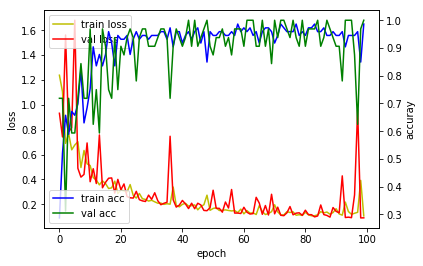

(4, 50) (50,)
(50, 50) (50,)
(50, 3) (3,)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                250       
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 153       
Total params: 2,953
Trainable params: 2,953
Non-trainable params: 0
_________________________________________________________________
45/45 [==============================] - 0s 155us/step


< TEST RESULT >
 [0.09410302158859041, 1.0]


In [7]:

#######################################################################################################################
# < Problem 2 > Iris_data
#######################################################################################################################
# 1. Data Load ------------------------------------------------------------------------------------------ 
#df = pd.read_excel("data/Abalone_original.xlsx")
#df = pd.read_excel("data/Iris_data.xlsx")
#df = pd.read_excel("data/Liver_data.xlsx")
np.random.seed(2045070)
df.shape
df.columns
df["Class"].dtype
df["Class"].value_counts()

data_x = df.iloc[:,:-1]
data_y = df.iloc[:,-1:]
label_encoder = LabelEncoder()
data_y1 = label_encoder.fit_transform(data_y)
data_y2 = to_categorical(data_y1)
data_y2.shape

train_x, test__x, train_y, test__y = train_test_split(data_x, data_y2, test_size=0.3)
train_x.shape
test__x.shape
test__y.shape

# 2. Make MLP ----------------------------------------------------------------------------------------
a_func = None
#a_func = 'relu'
opti_func = 'sgd'
#opti_func = 'rmsprop'
loop_cnt = 2
set_Node = [50] * loop_cnt 

count_feature = train_x.shape[1]
count__output = test__y.shape[1]

print( train_x.shape )
print( test__y.shape )
if count__output == 2 :
    last_activation = "sigmoid"
    v_loss = "binary_crossentropy"
elif count__output == 1 :
    last_activation = -1
    v_loss = -1
    print("Please Check Y_class, You have to convert sparse categorical~!")
else:
    last_activation = "softmax"
    v_loss = "categorical_crossentropy"

model = models.Sequential()

for loop_idx in range(loop_cnt):
    if loop_idx==0: model.add( layers.Dense(set_Node[loop_idx], activation=a_func, input_shape=(count_feature,) ) )
    else:           model.add( layers.Dense(set_Node[loop_idx], activation=a_func ) )

model.add( layers.Dense(count__output, activation=last_activation) )       
model.compile(optimizer = opti_func, loss = v_loss, metrics = ['accuracy'])

# 3. Fitting ----------------------------------------------------------------------------------------
#model.fit(train_x, train_y, epochs = 5, batch_size = 128)
val_size = round( train_x.shape[0]*0.3 )
x_val = train_x[:val_size]
partial_x_train = train_x[val_size:]
y_val = train_y[:val_size]
partial_y_train = train_y[val_size:]
hist = model.fit(partial_x_train,
                 partial_y_train,
                 epochs=100,
                 batch_size=10,
                 validation_data=(x_val, y_val))

graph(hist, "train_val")

for model_layer in model.layers:
#    print(model_layer.name, type(model_layer), model_layer.output_shape, model_layer.activation.__name__, model_layer.count_params())
    w1 = model_layer .get_weights()
#    print(w1)
    print( w1[0].shape, w1[1].shape )
model.summary()

results = model.evaluate(test__x, test__y)
print("\n\n< TEST RESULT >\n", results)


In [0]:
df = pd.read_excel("/gdrive/My Drive/DATA/Abalone_original.xlsx")

In [9]:
df.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,Class
0,0,0,1,0.075,0.055,0.010,0.0020,0.0010,0.0005,0.0015,1
1,0,0,1,0.150,0.100,0.025,0.0150,0.0045,0.0040,0.0050,2
2,0,0,1,0.130,0.100,0.030,0.0130,0.0045,0.0030,0.0040,3
3,0,0,1,0.110,0.090,0.030,0.0080,0.0025,0.0020,0.0030,3
4,0,0,1,0.165,0.120,0.030,0.0215,0.0070,0.0050,0.0050,3


class value_counts
 9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
24      2
27      2
1       1
25      1
2       1
26      1
29      1
Name: Class, dtype: int64
train_x :  (2923, 10)
test__y :  (1254, 28)


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train on 2046 samples, validate on 877 samples
Epoch 1/30
2046/2046 [==============================] - 1s 646us/step - loss: 2.3896 - acc: 0.2116 - val_loss: 2.3098 - val_acc: 0.2223
Epoch 2/30
2046/2046 [==============================] - 1s 393us/step - loss: 2.1996 - acc: 0.2102 - val_loss: 2.1891 - val_acc: 0.2281
Epoch 3/30
2046/2046 [==============================] - 1s 384us/step - loss: 2.1387 - acc: 0.2273 - val_loss: 2.1474 - val_acc: 0.2326
Epoch 4/30
2046/2046 [==============================] - 1s 392us/step - loss: 2.1178 - acc: 0.2380 - val_loss: 2.1788 - val_acc: 0.2258
Epoch 5/30
2046/2046 [==============================] - 1s 387us/step - loss: 2.1065 - acc: 0.2243 - val_loss: 2.0147 - val_acc: 0.2463
Epoch 6/30
2046/2046 [==============================] - 1s 386us/step - loss: 2.1015 - acc: 0.2322 - val_loss: 2.0535 - val_acc: 0.2383
Epoch 7/30
2046/2046 [==============================] - 1s 402us/step - loss: 2.0883 - acc: 0.2317 - val_loss: 2.0643 - val_acc: 0.2577
E

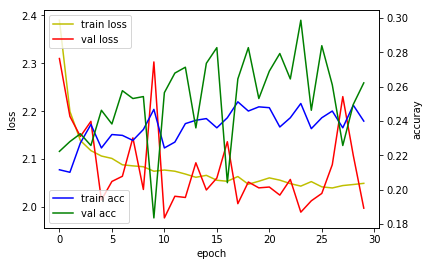

1254/1254 [==============================] - 0s 63us/step


< TEST RESULT >
 [2.0118400913676577, 0.27910685805422647]


In [11]:
# 1. Data Load ------------------------------------------------------------------------------------------ 
#df = pd.read_excel("data/Abalone_original.xlsx")
#df = pd.read_excel("data/Iris_data.xlsx")
#df = pd.read_excel("data/Liver_data.xlsx")
np.random.seed(2045070)
df.shape
df.columns
df["Class"].dtype
print( "class value_counts\n", df["Class"].value_counts() )

data_x = df.iloc[:,:-1]
data_y = df.iloc[:,-1:]
label_encoder = LabelEncoder()
data_y1 = label_encoder.fit_transform(data_y)
data_y2 = to_categorical(data_y1)
data_y2.shape

# scaler = "NONE()"
scaler = preprocessing.StandardScaler()
# scaler = preprocessing.MinMaxScaler()
data_x2 = transscale(scaler, data_x)

train_x, test__x, train_y, test__y = train_test_split(data_x2, data_y2, test_size=0.3)
print( "train_x : ", train_x.shape )
test__x.shape
print( "test__y : ", test__y.shape )

# 2. Make MLP ----------------------------------------------------------------------------------------
a_func = None
# a_func = 'relu'
# opti_func = 'sgd'
opti_func = 'rmsprop'
# opti_func = "adam"
loop_cnt = 10
set_Node = [100] * loop_cnt 

count_feature = train_x.shape[1]
count__output = test__y.shape[1]

if count__output == 2 :
    last_activation = "sigmoid"
    v_loss = "binary_crossentropy"
elif count__output == 1 :
    last_activation = -1
    v_loss = -1
    print("Please Check Y_class, You have to convert sparse categorical~!")
else:
    last_activation = "softmax"
    v_loss = "categorical_crossentropy"

model = models.Sequential()

for loop_idx in range(loop_cnt):
    if loop_idx==0: model.add( layers.Dense(set_Node[loop_idx], activation=a_func, input_shape=(count_feature,) ) )
    else:           model.add( layers.Dense(set_Node[loop_idx], activation=a_func ) )

model.add( layers.Dense(count__output, activation=last_activation) )       
model.compile(optimizer = opti_func, loss = v_loss, metrics = ['accuracy'])

# 3. Fitting ----------------------------------------------------------------------------------------
#model.fit(train_x, train_y, epochs = 5, batch_size = 128)
val_size = round( train_x.shape[0]*0.3 )
x_val = train_x[:val_size]
partial_x_train = train_x[val_size:]
y_val = train_y[:val_size]
partial_y_train = train_y[val_size:]
hist = model.fit(partial_x_train,
                 partial_y_train,
                 epochs=30,
                 batch_size=20,
                 validation_data=(x_val, y_val))

graph(hist, "train_val")

# for model_layer in model.layers:
# #    print(model_layer.name, type(model_layer), model_layer.output_shape, model_layer.activation.__name__, model_layer.count_params())
#     w1 = model_layer .get_weights()
# #    print(w1)
#     print( w1[0].shape, w1[1].shape )
# model.summary()

results = model.evaluate(test__x, test__y)
print("\n\n< TEST RESULT >\n", results)

In [0]:
df = pd.read_excel("/gdrive/My Drive/DATA/Liver_data.xlsx")

In [7]:
df.head()

,f1,f2,f3,f4,f5,f6,Class
0,85,92,45,27,31,0.0,Present
1,88,62,20,17,9,0.5,Present
2,88,67,21,11,11,0.5,Present
3,92,54,22,20,7,0.5,Present
4,90,60,25,19,5,0.5,Present


class value_counts
 Absent     200
Present    145
Name: Class, dtype: int64
(345, 6)
(345, 2)


count_input col :  6
activation func :  sigmoid
loss func       :  binary_crossentropy
last output     :  2







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


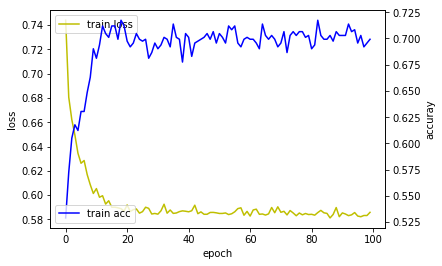

69/69 [==============================] - 0s 1ms/step
loss: 69.04%, acc: 70.29%
acc :  0.7028985515884731  loss :  0.6903951366742452


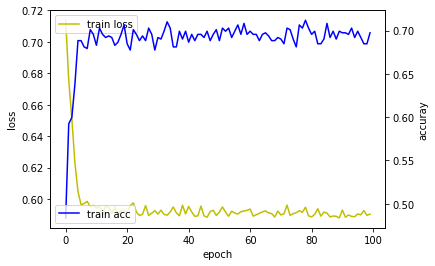

69/69 [==============================] - 0s 2ms/step
loss: 66.29%, acc: 65.22%
acc :  0.6521739139073137  loss :  0.6628617540649746


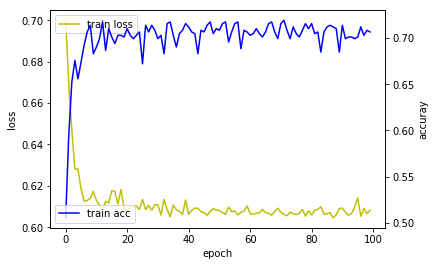

69/69 [==============================] - 0s 3ms/step
loss: 58.32%, acc: 68.12%
acc :  0.6811594202898551  loss :  0.5832428975381713


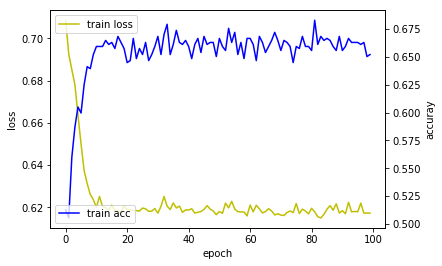

69/69 [==============================] - 0s 3ms/step
loss: 54.97%, acc: 74.64%
acc :  0.7463768107303674  loss :  0.5496733931527622


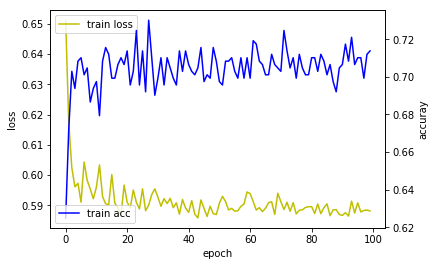

69/69 [==============================] - 0s 4ms/step
loss: 66.28%, acc: 66.67%
acc :  0.6666666683943375  loss :  0.6628322778404623


< TEST RESULT > 

LOSS : 62.98% (+/- 5.37%)
ACC  : 68.99% (+/- 3.29%)


In [8]:
# 1. Data Load ------------------------------------------------------------------------------------------ 
#df = pd.read_excel("data/Abalone_original.xlsx")
#df = pd.read_excel("data/Iris_data.xlsx")
#df = pd.read_excel("data/Liver_data.xlsx")
np.random.seed(2045070)
df.shape
df.columns
df["Class"].dtype
print( "class value_counts\n", df["Class"].value_counts() )

data_x = df.iloc[:,:-1]
data_y = df.iloc[:,-1:]
label_encoder = LabelEncoder()
data_y1 = label_encoder.fit_transform(data_y)
data_y2 = to_categorical(data_y1)
data_y2.shape

# scaler = "NONE()"
scaler = preprocessing.StandardScaler()
# scaler = preprocessing.MinMaxScaler()
data_x2 = transscale(scaler, data_x)

# train_x, test__x, train_y, test__y = train_test_split(data_x2, data_y2, test_size=0.3)
# print( "train_x : ", train_x.shape )
# test__x.shape
# print( "test__y : ", test__y.shape )

# 2. Make MLP ----------------------------------------------------------------------------------------
a_func = None
# a_func = 'relu'
# opti_func = 'sgd'
# opti_func = 'rmsprop'
opti_func = "adam"
loop_cnt = 10
set_Node = [10] * loop_cnt 

count_feature = data_x2.shape[1]
count__output = data_y2.shape[1]

print(data_x2.shape)
print(data_y2.shape)
if count__output == 2 :
    last_activation = "sigmoid"
    v_loss = "binary_crossentropy"
elif count__output == 1 :
    last_activation = -1
    v_loss = -1
    print("Please Check Y_class, You have to convert sparse categorical~!")
else:
    last_activation = "softmax"
    v_loss = "categorical_crossentropy"

print("\n")
print( "count_input col : ", count_feature)
print( "activation func : ", last_activation)
print( "loss func       : ", v_loss)
print( "last output     : ", count__output)
print("\n")

# 3. Fitting ----------------------------------------------------------------------------------------
kfold = KFold(n_splits=5, shuffle=True, random_state=1)
acc__scores=[]
loss_scores=[]
data_x2 = np.array(data_x2)
data_y2 = np.array(data_y2)
for train, test in kfold.split(data_x2, data_y2):
    model = create_model(loop_cnt, count_feature, count__output, a_func, last_activation, opti_func, v_loss)
    # print(train, test)
    hist = model.fit(data_x2[train], data_y2[train], epochs=100, batch_size=10, verbose=0)
    graph(hist, "train")
    scores = model.evaluate(data_x2[test], data_y2[test] )
    # print(model.metrics_names[1]," : ", scores[1]*100)
    print("%s: %.2f%%, %s: %.2f%%" % (model.metrics_names[0], scores[0]*100, model.metrics_names[1], scores[1]*100 ) )
    print("acc : ", scores[1]," loss : ", scores[0])
    acc__scores.append(scores[1] * 100)
    loss_scores.append(scores[0] * 100)
print("\n\n< TEST RESULT > \n")
print("LOSS : %.2f%% (+/- %.2f%%)" % (np.mean(loss_scores), np.std(loss_scores)))
print("ACC  : %.2f%% (+/- %.2f%%)" % (np.mean(acc__scores), np.std(acc__scores)))


['loss', 'acc']

In [0]:
df = pd.read_excel("/gdrive/My Drive/DATA/Abalone_original.xlsx")

In [0]:
df.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,Class
0,0,0,1,0.075,0.055,0.010,0.0020,0.0010,0.0005,0.0015,1
1,0,0,1,0.150,0.100,0.025,0.0150,0.0045,0.0040,0.0050,2
2,0,0,1,0.130,0.100,0.030,0.0130,0.0045,0.0030,0.0040,3
3,0,0,1,0.110,0.090,0.030,0.0080,0.0025,0.0020,0.0030,3
4,0,0,1,0.165,0.120,0.030,0.0215,0.0070,0.0050,0.0050,3


class value_counts
 9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
24      2
27      2
1       1
25      1
2       1
26      1
29      1
Name: Class, dtype: int64


count_input col :  10
activation func :  softmax
loss func       :  categorical_crossentropy
last output     :  28




/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


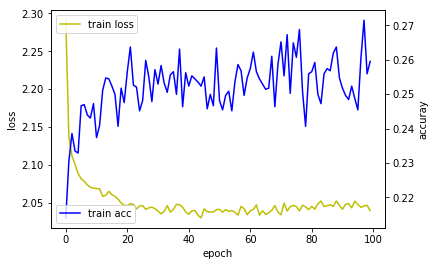

836/836 [==============================] - 0s 467us/step
loss: 207.80%, acc: 26.56%


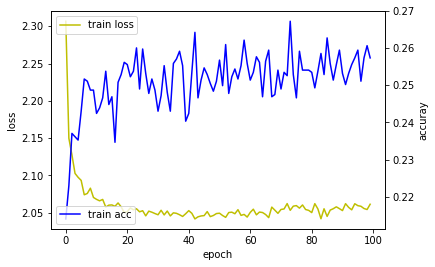

836/836 [==============================] - 0s 531us/step
loss: 214.68%, acc: 27.51%


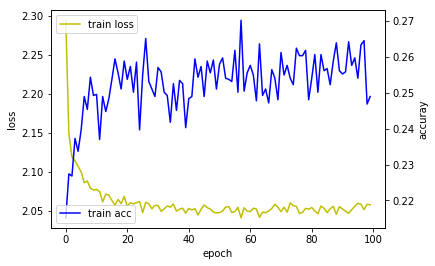

835/835 [==============================] - 0s 568us/step
loss: 203.99%, acc: 25.39%


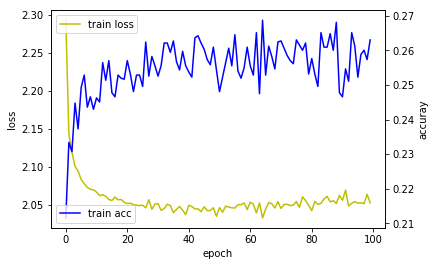

835/835 [==============================] - 1s 623us/step
loss: 204.54%, acc: 25.27%


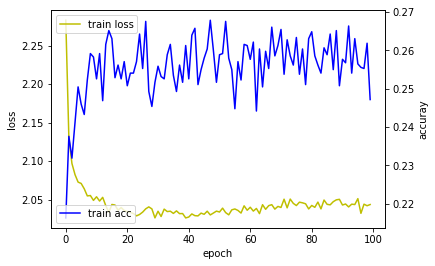

835/835 [==============================] - 1s 681us/step
loss: 209.11%, acc: 26.47%


< TEST RESULT > 

LOSS : 208.02% (+/- 3.85%)
ACC  : 26.24% (+/- 0.83%)


In [0]:

# 1. Data Load ------------------------------------------------------------------------------------------ 
#df = pd.read_excel("data/Abalone_original.xlsx")
#df = pd.read_excel("data/Iris_data.xlsx")
#df = pd.read_excel("data/Liver_data.xlsx")
np.random.seed(2045070)
df.shape
df.columns
df["Class"].dtype
print( "class value_counts\n", df["Class"].value_counts() )

data_x = df.iloc[:,:-1]
data_y = df.iloc[:,-1:]
label_encoder = LabelEncoder()
data_y1 = label_encoder.fit_transform(data_y)
data_y2 = to_categorical(data_y1)
data_y2.shape


# scaler = "NONE()"
scaler = preprocessing.StandardScaler()
# scaler = preprocessing.MinMaxScaler()
data_x2 = transscale(scaler, data_x)

# train_x, test__x, train_y, test__y = train_test_split(data_x2, data_y2, test_size=0.3)
# print( "train_x : ", train_x.shape )
# test__x.shape
# print( "test__y : ", test__y.shape )

# 2. Make MLP ----------------------------------------------------------------------------------------

a_func = None
# a_func = 'relu'
# opti_func = 'sgd'
opti_func = 'rmsprop'
# opti_func = "adam"
loop_cnt = 10
set_Node = [10] * loop_cnt 

count_feature = data_x2.shape[1]
count__output = data_y2.shape[1]

if count__output == 2 :
    last_activation = "sigmoid"
    v_loss = "binary_crossentropy"
elif count__output == 1 :
    last_activation = -1
    v_loss = -1
    print("Please Check Y_class, You have to convert sparse categorical~!")
else:
    last_activation = "softmax"
    v_loss = "categorical_crossentropy"

print("\n")
print( "count_input col : ", count_feature)
print( "activation func : ", last_activation)
print( "loss func       : ", v_loss)
print( "last output     : ", count__output)
print("\n")

# 3. Fitting ----------------------------------------------------------------------------------------


kfold = KFold(n_splits=5, shuffle=True, random_state=1)
acc__scores=[]
loss_scores=[]
data_x2 = np.array(data_x2)
data_y2 = np.array(data_y2)
for train, test in kfold.split(data_x2, data_y2):
    model = create_model(loop_cnt, count_feature, count__output, a_func, last_activation, opti_func, v_loss)
    # print(train, test)
    hist = model.fit(data_x2[train], data_y2[train], epochs=100, batch_size=10, verbose=0)
    graph(hist, "train")
    scores = model.evaluate(data_x2[test], data_y2[test] )
    # print(model.metrics_names[1]," : ", scores[1]*100)
    print("%s: %.2f%%, %s: %.2f%%" % (model.metrics_names[0], scores[0]*100, model.metrics_names[1], scores[1]*100 ) )
    acc__scores.append(scores[1] * 100)
    loss_scores.append(scores[0] * 100)
print("\n\n< TEST RESULT > \n")
print("LOSS : %.2f%% (+/- %.2f%%)" % (np.mean(loss_scores), np.std(loss_scores)))
print("ACC  : %.2f%% (+/- %.2f%%)" % (np.mean(acc__scores), np.std(acc__scores)))